# Sprint Retrospective Analysis

## Objective
Analyze historical sprint data to identify areas for improvement and enhance future sprint planning.

## Instructions
Follow the steps provided in this notebook to load the data, preprocess it, perform exploratory data analysis, train a predictive model, and draw insights for sprint retrospectives.


In [1]:
# Install necessary libraries
!pip install -r requirements.txt



[notice] A new release of pip is available: 23.3.2 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Step 1: Load the Dataset
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
data = pd.read_csv('sprint_data.csv')

# Explore dataset
print("First 5 rows of the dataset:")
print(data.head())
print("\nSummary statistics of the dataset:")
print(data.describe())


First 5 rows of the dataset:
   sprint_id team_member  task_id   task_description  estimated_hours  \
0          1       Alice      101  Setup environment              5.0   
1          1         Bob      102  Develop feature A             10.0   
2          1     Charlie      103     Test feature A              3.0   
3          2       Alice      201  Develop feature B              8.0   
4          2         Bob      202        Review code              2.0   

   actual_hours completion_status  
0           6.0         Completed  
1          18.0       In Progress  
2           4.0         Completed  
3           7.0         Completed  
4           3.0         Completed  

Summary statistics of the dataset:
       sprint_id     task_id  estimated_hours  actual_hours
count  18.000000   18.000000        15.000000     15.000000
mean    3.500000  352.333333         5.666667      7.733333
std     1.757338  175.941167         2.919556      4.283968
min     1.000000  101.000000         2.0

In [3]:
# Step 2: Data Preprocessing

# Handle missing values (if any)
data = data.dropna(subset=['estimated_hours', 'actual_hours', 'completion_status'])

# Select relevant columns
relevant_columns = ['sprint_id', 'team_member', 'task_id', 'task_description', 'estimated_hours', 'actual_hours', 'completion_status']
data = data[relevant_columns]

# Create new feature for time difference
data['time_diff'] = data['actual_hours'] - data['estimated_hours']

# Display the first few rows of the preprocessed dataset
print("First 5 rows of the preprocessed dataset:")
print(data.head())


First 5 rows of the preprocessed dataset:
   sprint_id team_member  task_id   task_description  estimated_hours  \
0          1       Alice      101  Setup environment              5.0   
1          1         Bob      102  Develop feature A             10.0   
2          1     Charlie      103     Test feature A              3.0   
3          2       Alice      201  Develop feature B              8.0   
4          2         Bob      202        Review code              2.0   

   actual_hours completion_status  time_diff  
0           6.0         Completed        1.0  
1          18.0       In Progress        8.0  
2           4.0         Completed        1.0  
3           7.0         Completed       -1.0  
4           3.0         Completed        1.0  


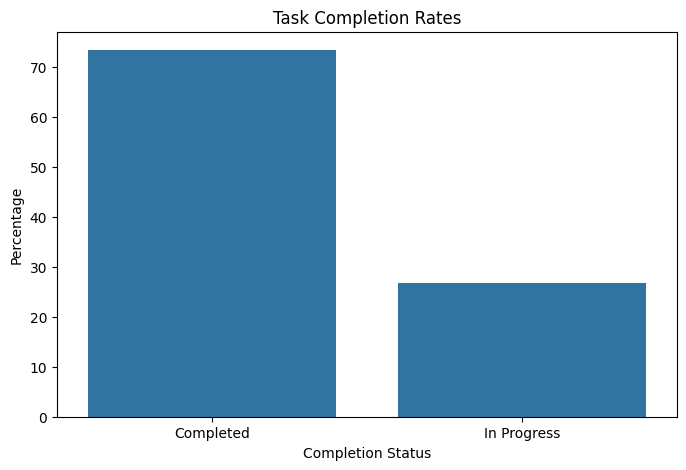

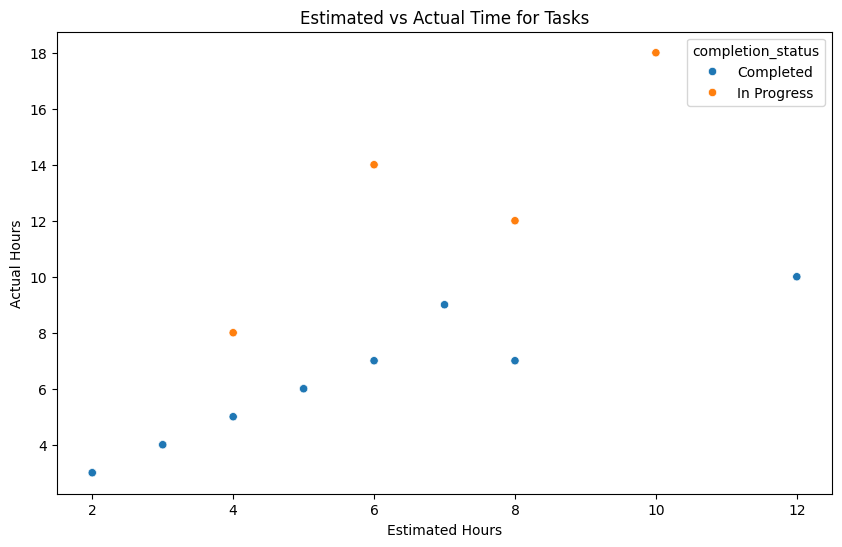

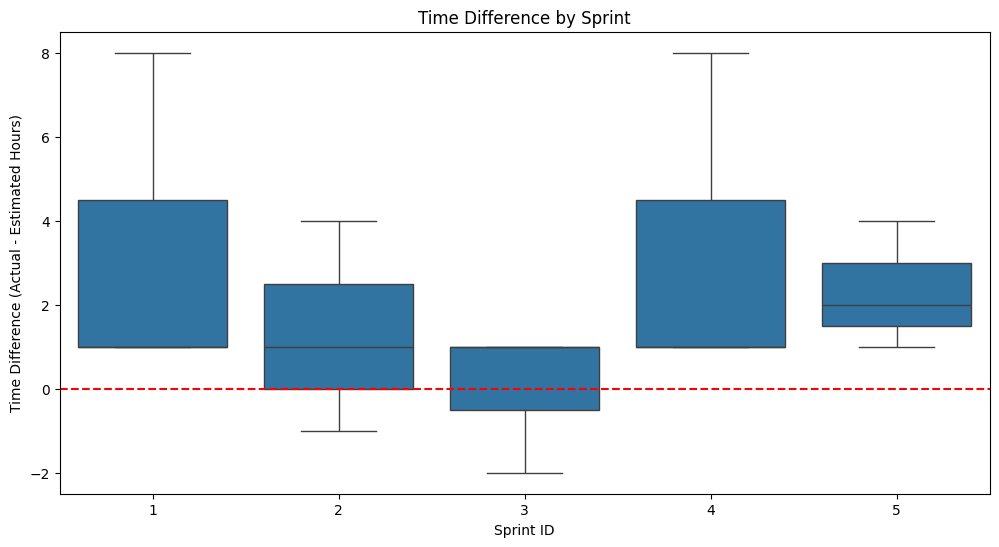

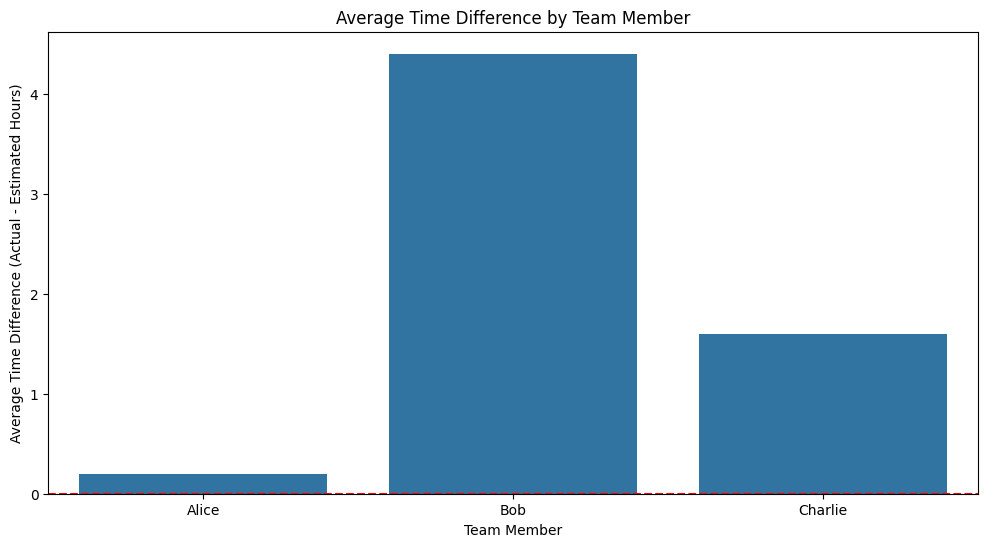

In [4]:
# Step 3: Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Plot task completion rates
completion_rate = data['completion_status'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=completion_rate.index, y=completion_rate.values)
plt.title('Task Completion Rates')
plt.xlabel('Completion Status')
plt.ylabel('Percentage')
plt.show()

# Plot estimated vs actual time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='estimated_hours', y='actual_hours', data=data, hue='completion_status')
plt.title('Estimated vs Actual Time for Tasks')
plt.xlabel('Estimated Hours')
plt.ylabel('Actual Hours')
plt.show()

# Plot time difference by sprint
plt.figure(figsize=(12, 6))
sns.boxplot(x='sprint_id', y='time_diff', data=data)
plt.title('Time Difference by Sprint')
plt.xlabel('Sprint ID')
plt.ylabel('Time Difference (Actual - Estimated Hours)')
plt.axhline(0, color='r', linestyle='--')
plt.show()

# Plot average time difference by team member
team_member_perf = data.groupby('team_member')['time_diff'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='team_member', y='time_diff', data=team_member_perf)
plt.title('Average Time Difference by Team Member')
plt.xlabel('Team Member')
plt.ylabel('Average Time Difference (Actual - Estimated Hours)')
plt.axhline(0, color='r', linestyle='--')
plt.show()


In [5]:
# Step 4: Model Training and Evaluation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Encode categorical variables
team_member_encoder = LabelEncoder()
data['team_member_encoded'] = team_member_encoder.fit_transform(data['team_member'])

# Vectorize task descriptions
vectorizer = TfidfVectorizer()
task_description_vectors = vectorizer.fit_transform(data['task_description'])

# Prepare data for model training
X_estimate = pd.concat([data[['team_member_encoded']], pd.DataFrame(task_description_vectors.toarray())], axis=1)
X_estimate.columns = X_estimate.columns.astype(str)  # Ensure all feature names are strings
y_estimate = data['estimated_hours']
X_actual = pd.concat([data[['team_member_encoded', 'estimated_hours']], pd.DataFrame(task_description_vectors.toarray())], axis=1)
X_actual.columns = X_actual.columns.astype(str)  # Ensure all feature names are strings
y_actual = data['actual_hours']

X_estimate_train, X_estimate_test, y_estimate_train, y_estimate_test = train_test_split(X_estimate, y_estimate, test_size=0.2, random_state=42)
X_actual_train, X_actual_test, y_actual_train, y_actual_test = train_test_split(X_actual, y_actual, test_size=0.2, random_state=42)

# Train a RandomForest model for estimated hours
model_estimate = RandomForestRegressor(random_state=42)
model_estimate.fit(X_estimate_train, y_estimate_train)

# Train a RandomForest model for actual hours
model_actual = RandomForestRegressor(random_state=42)
model_actual.fit(X_actual_train, y_actual_train)

# Evaluate model performance
print("Model performance for estimated hours on the test set:")
print(f'R^2 Score: {model_estimate.score(X_estimate_test, y_estimate_test)}')

print("Model performance for actual hours on the test set:")
print(f'R^2 Score: {model_actual.score(X_actual_test, y_actual_test)}')


Model performance for estimated hours on the test set:
R^2 Score: -4.272617333333332
Model performance for actual hours on the test set:
R^2 Score: -21.74765


In [6]:
# Step 5: Predictive Analysis for Sprint 6

# Prepare data for sprint 6
sprint_6 = pd.DataFrame({
    'team_member': ['Alice', 'Bob', 'Charlie'],
    'task_description': ['Develop Feature', 'Test feature', 'Review Code'],
    'team_member_encoded': team_member_encoder.transform(['Alice', 'Bob', 'Charlie']),
})
sprint_6_task_description_vectors = vectorizer.transform(sprint_6['task_description'])

# Predict estimated_hours for sprint 6
sprint_6_X_estimate = pd.concat([sprint_6[['team_member_encoded']], pd.DataFrame(sprint_6_task_description_vectors.toarray())], axis=1)
sprint_6_X_estimate.columns = sprint_6_X_estimate.columns.astype(str)  # Ensure all feature names are strings
sprint_6['estimated_hours'] = model_estimate.predict(sprint_6_X_estimate)

# Predict actual_hours for sprint 6
sprint_6_X_actual = pd.concat([sprint_6[['team_member_encoded', 'estimated_hours']], pd.DataFrame(sprint_6_task_description_vectors.toarray())], axis=1)
sprint_6_X_actual.columns = sprint_6_X_actual.columns.astype(str)  # Ensure all feature names are strings
sprint_6['actual_hours'] = model_actual.predict(sprint_6_X_actual)

# Decode the categorical variables
sprint_6['team_member'] = team_member_encoder.inverse_transform(sprint_6['team_member_encoded'])

# Display predictions for sprint 6
print("Predictions for sprint 6:")
print(sprint_6[['team_member', 'task_description', 'estimated_hours', 'actual_hours']])


Predictions for sprint 6:
  team_member task_description  estimated_hours  actual_hours
0       Alice  Develop Feature         9.934667         10.87
1         Bob     Test feature         3.515667          6.71
2     Charlie      Review Code         2.439667          3.21


## Conclusion

In this analysis, we loaded and preprocessed sprint data, conducted exploratory data analysis to visualize task completion rates and time discrepancies, trained a machine learning model to predict sprint outcomes, and generated actionable insights based on the model's predictions. By leveraging these insights, teams can improve sprint planning, allocate resources more effectively, and enhance overall productivity.

Further analysis can include trend analysis over multiple sprints and correlation analysis between different variables to gain deeper insights into the factors influencing sprint outcomes.
